# Chargement des données

La base de données est à télécharger depuis Git.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
IMAGE_SIZE = 512
CLASSES = ['Ladybug', 'Monarch', 'Mourning Cloak', 'Oleander Hawk Moth',
           'Orange Oakleaf', 'Fall Armyworms', 'Corn Earworms', 'Corn Borers', 'Armyworms', 'Tomato Hornworms']

!git clone https://github.com/AkkarKhadija24/Image-Classifier-Project.git


fatal: destination path 'Image-Classifier-Project' already exists and is not an empty directory.


In [ ]:
path = "./Image-Classifier-Project/Data-new/"

# Partitionnement des données

Dans notre projet **Insects Detection**, on a choisi de classifier des images associées à 10 labels différents : **Fall Armyworms**, **Corn Earworms**, **Armyworms**, **Tomato Hornworms**, **Ladybug**, **Mourning Cloak**, **Monarch**, **Oleander Hawk Moth**, **Orange Oakleaf** et **Corn Borers**.


On a réparti nos 1000 images dans 3 ensembles (et donc 3 dossiers): *train*, *validation* et *test*. Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes. L'arborescence est résumée sur l'image ci-dessus.

On a choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui nous garantit une certaine simplicité. 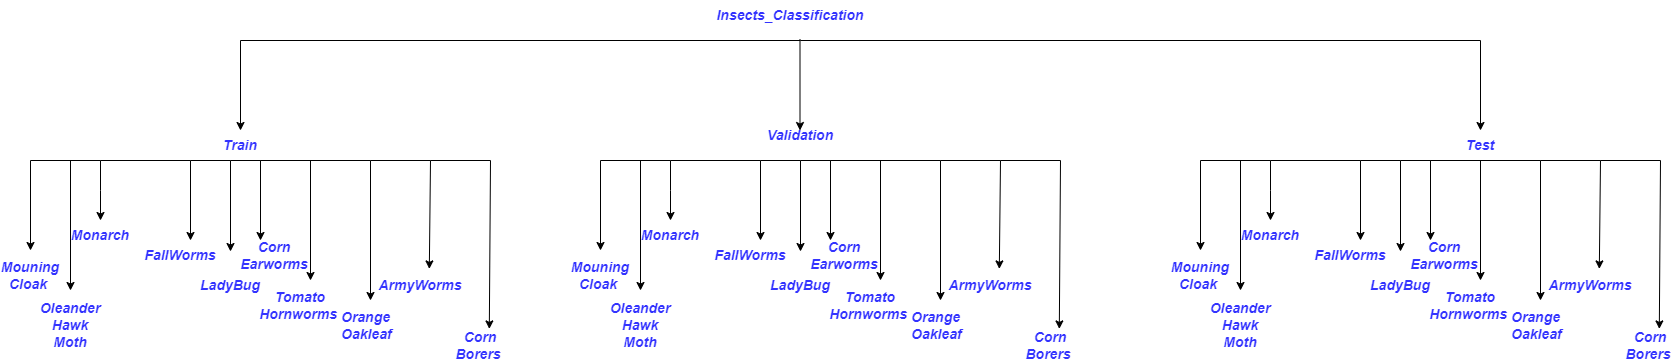

Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Nous avons construit notre arborescence de la même manière que celle vue en TP faite par le tuteur Monsieur Axel Carlier, et qu'on a adapté par les noms de labels de notre projet.

In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1

    return x, y

Voici ensuite un exemple de chargement de nos données. On peut modifier la dimension des images, ce qui sera utile à différents stades de notre projet.

In [ ]:
labels = ['ladybug', 'Tomato Hornworms', 'Armyworms', 'ORANGE OAKLEAF', 'Corn Borers', 'OLEANDER HAWK MOTH', 'MONARCH', 'MOURNING CLOAK', 'Corn Earworms', 'Fall Armyworms']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

(843, 64, 64, 3) (843, 1)
(187, 64, 64, 3) (187, 1)
(189, 64, 64, 3) (189, 1)


# Visualisation des données :

Nous pouvons utiliser le bloc suivant pour afficher quelques-unes de nos
images, et ainsi vérifier que tout s'est bien passé.

<ipython-input-48-3f852fcfdc0d>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


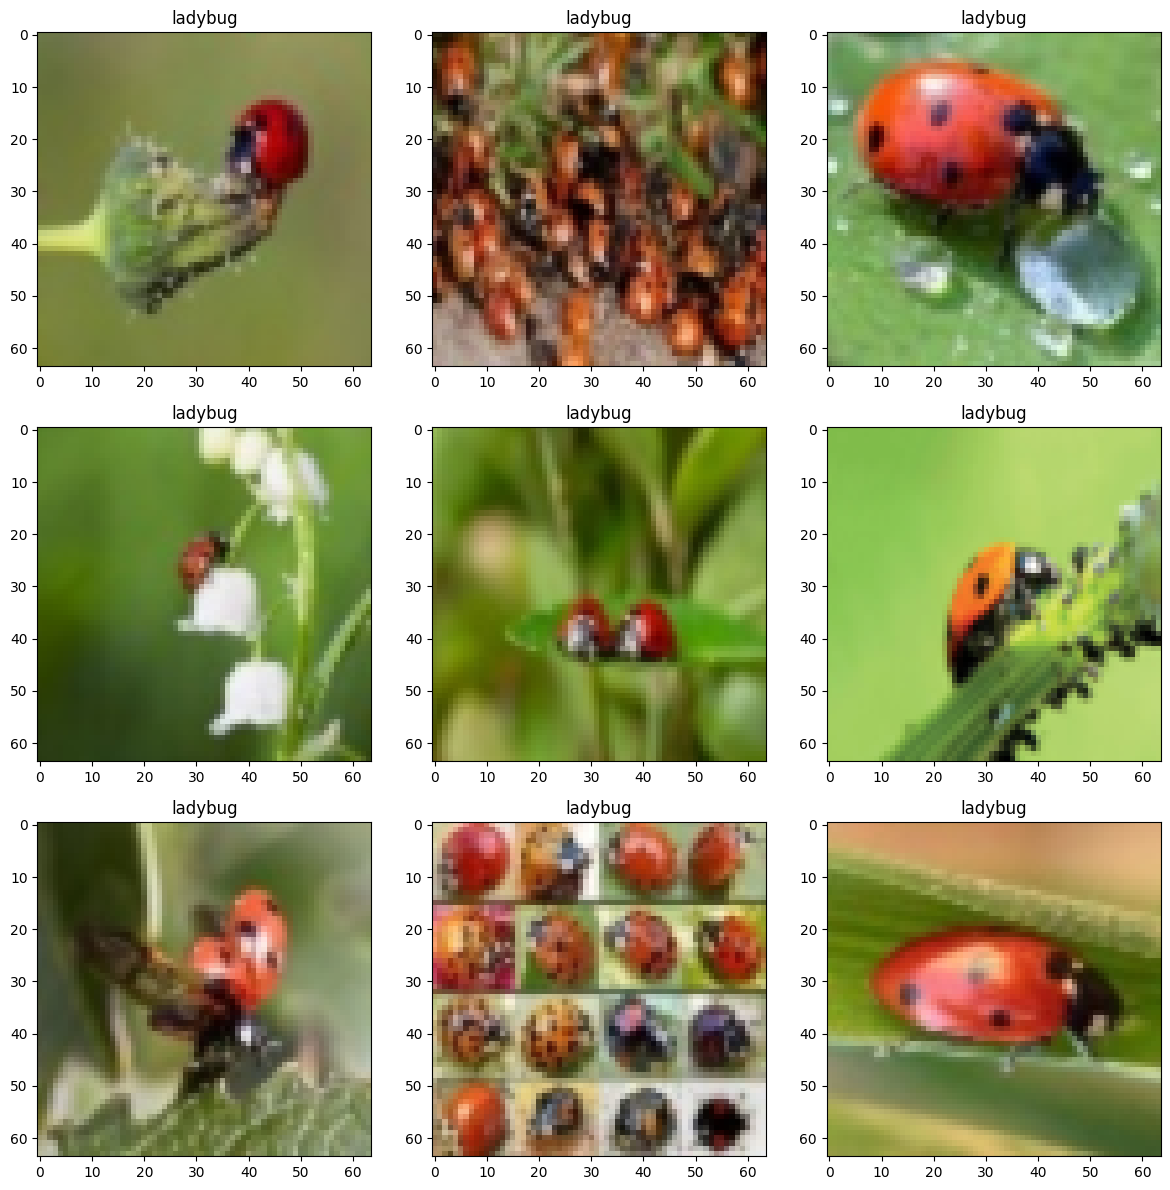

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# A COMPLETER
# model.add(Conv2D(...))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Flatten())
# model.add(Dense(...))   # Couche dense, à 512 neurones
model.add(Dense(512, activation='relu'))
# model.add(Dense(...))   # Couche de sortie
model.add(Dense(10, activation='softmax'))
model.summary() # affiche un résumé du modèle

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 96)         

### Correction du surapprentissage

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True)

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=20),
                    validation_data=(x_val, y_val),
                    epochs=30)

#history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=20)

Epoch 1/30
43/43 [==============================] - 10s 189ms/step - loss: 5.1496 - sparse_categorical_accuracy: 0.2242 - val_loss: 1.9783 - val_sparse_categorical_accuracy: 0.3797
Epoch 2/30
43/43 [==============================] - 7s 152ms/step - loss: 1.8980 - sparse_categorical_accuracy: 0.3701 - val_loss: 1.6601 - val_sparse_categorical_accuracy: 0.4064
Epoch 3/30
43/43 [==============================] - 7s 153ms/step - loss: 1.7079 - sparse_categorical_accuracy: 0.4152 - val_loss: 1.5105 - val_sparse_categorical_accuracy: 0.5294
Epoch 4/30
43/43 [==============================] - 7s 151ms/step - loss: 1.5997 - sparse_categorical_accuracy: 0.4472 - val_loss: 1.4018 - val_sparse_categorical_accuracy: 0.5401
Epoch 5/30
43/43 [==============================] - 8s 174ms/step - loss: 1.5525 - sparse_categorical_accuracy: 0.4603 - val_loss: 1.3229 - val_sparse_categorical_accuracy: 0.5401
Epoch 6/30
43/43 [==============================] - 8s 180ms/step - loss: 1.5236 - sparse_categoric

**Analyse des résultats du modèle**

Les quelques lignes suivantes permettent d'afficher l'évolution des métriques au cours de l'entraînement, sur les ensembles d'apprentissage et de validation.

In [ ]:
def plot_training_analysis():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

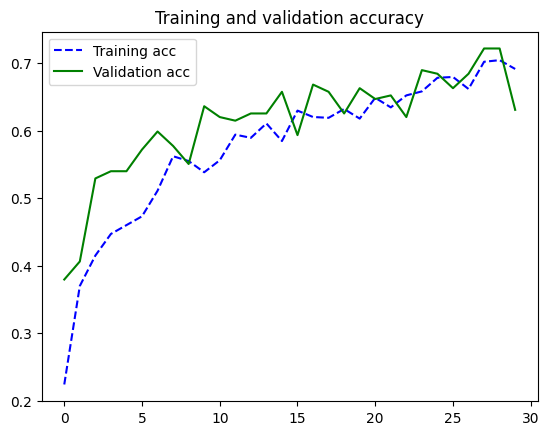

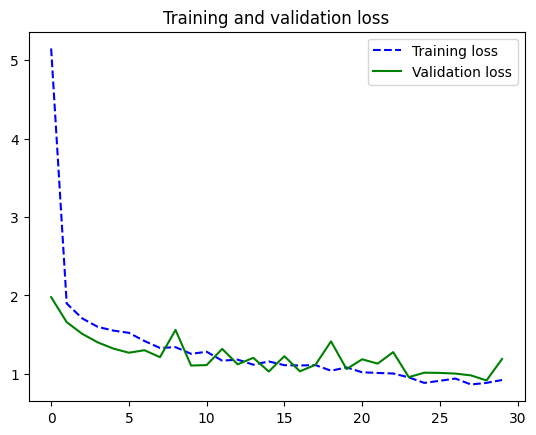

In [ ]:
plot_training_analysis()